In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv',encoding='latin-1',parse_dates=True)



df.drop(['cn/ln','Registration','Flight #','Time','Summary'],axis=1,inplace=True)
df.head()

,Date,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
0,9/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,9/7/1909,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,7/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,8/6/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,9/9/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Location               4994 non-null   object 
 2   Operator               4988 non-null   object 
 3   Route                  4221 non-null   object 
 4   AC Type                4983 non-null   object 
 5   Aboard                 4980 non-null   float64
 6   Aboard Passangers      4769 non-null   float64
 7   Aboard Crew            4772 non-null   float64
 8   Fatalities             4990 non-null   float64
 9   Fatalities Passangers  4756 non-null   float64
 10  Fatalities Crew        4757 non-null   float64
 11  Ground                 4956 non-null   float64
dtypes: float64(7), object(5)
memory usage: 468.7+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.describe()

,Date,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4998,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,1971-07-04 09:31:37.238895528,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-06-15 06:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1970-11-27 00:00:00,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,1992-06-06 18:00:00,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,2023-11-01 00:00:00,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000
std,NaN,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273


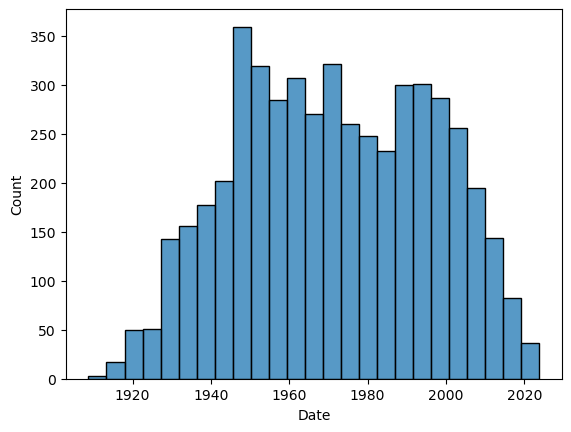

In [7]:
sns.histplot(df['Date']);

In [8]:
df['AC Type'].dtype == 'O'

True

In [9]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(col,len(df[col].unique()))

Location 4123
Operator 2265
Route 3826
AC Type 2464


In [10]:
len(df[df['Route'].str.find('-') > -1])

3985

Route

In [11]:
df['Route'].value_counts().nlargest(10)

Route
Training                      93
Sightseeing                   31
Test flight                   22
Sao Paulo - Rio de Janeiro     7
Test                           6
Rio de Janeiro - Sao Paulo     5
Demonstration                  4
Bogota - Barranquilla          4
Villavicencio - Mitu           4
Barranquilla - Bogota          4
Name: count, dtype: int64

In [12]:
df['Route'].isna().sum()

777

In [13]:
df['Route'].fillna('Unknown',inplace=True)

In [14]:
df['Route-start'] = [s[0:s.find('-')] if s.find('-') > -1 else s for s in df['Route']]
df['Route-end'] = [s[s.find('-')+1:] if s.find('-') > -1 else s for s in df['Route']]

Location

In [15]:
df['Location'].value_counts().nlargest(10)

Location
Moscow, Russia            17
Manila, Philippines       15
New York, New York        14
Sao Paulo, Brazil         13
Cairo, Egypt              13
Rio de Janeiro, Brazil    12
Bogota, Colombia          12
Chicago, Illinois         11
Near Moscow, Russia       11
Tehran, Iran              10
Name: count, dtype: int64

In [16]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='asadsabir101@gmail.com')



In [25]:
for i,j in enumerate([3,4,5]):
    print(i,j)

0 3
1 4
2 5


In [28]:
len(df.dropna())

4710

In [27]:
len(df)


4998

In [29]:
def my_geocoder(row):
    try:
        if row[0:4] == 'Near':
            row = row[4:]
        elif row[0:3] == 'Off':
            row = row[3:]
        elif row[0:4] == 'Over':
            row = row[4:]
        point = geolocator.geocode(row).point
        return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
    except:
        return None

df[['Latitude', 'Longitude']] = df.apply(lambda x: my_geocoder(x['Location']) , axis=1)

In [30]:
no_location = df['Latitude'].isna()

In [38]:
df[no_location]['Location'].value_counts()

Location
Manila, Philippines             15
Bogota, Colombia                12
Ankara, Turkey                   6
Shanghai, China                  4
Near Prague, Czechoslovakia      4
                                ..
Guadarrama Mountains, Spain      1
Dabouk, Jordan                   1
Near Toumavista, Peru            1
Off Mar del Plata, Aregntina     1
Eleftheroupolis, Greece          1
Name: count, Length: 937, dtype: int64

In [36]:
df[no_location]['Location'].unique().tolist()

['Near Jambol, Bulgeria',
 'Near Texel Island, North Sea',
 'Off Vlieland Island, North Sea',
 'Ameland Island, North Sea',
 'Cantonsville, Maryland',
 'English Channel off Forkstone, Kent',
 'Catherham, Surrey, UK',
 'Hillersburg, Pennsylvania',
 'Mendotta, Minnisota',
 'Toulouse, France',
 'Near Murchinson River, Australia',
 'Pao Ting Fou, China',
 'Near Amiens, Picrdie, France',
 'East Mallling, United Kingdom',
 'Near Tiflis, Georgia, USSR',
 'Rossaugpt, Czechoslovakia',
 'Leigh, Kent, Unied Kingdom',
 'Thies, Mauritania',
 'Over the Gulf of Finland',
 "L'Hospitalet, AriÃ¨ge",
 'Off Cape Griz Nez, France',
 'Florianopolis, Brazil Florianopolis, Brazil Florianopolis, Brazil',
 'Near Port Townsend, BC, Canada',
 'Heroldbach, Germany',
 'San Diego, California',
 'Barcelona, Spain',
 'Mt. Taylor, near Grants, New Mexico',
 'Terranova Pausania, East Sardinia',
 'Brawnson, Nebraska',
 'Iglau, Czechoslovakia',
 'La Rache, Morocco',
 'Off of Santos, Brazil',
 'Techachapi Mountains, Califo

In [66]:
new_latitudes = []
new_longitudes = []

for i in range(len(df)):
    if df['Latitude'].iloc[i] == 'nan':
        row = df['Location'].iloc[i]

        try:
            if row[0:4] == 'Near':
                row = row[4:]
            elif row[0:3] == 'Off':
                row = row[3:]
            elif row[0:4] == 'Over':
                row = row[4:]
            point = geolocator.geocode(row).point
            new_latitudes.append(point.latitude)
            new_longitudes.append(point.longitude)
        except:
            new_latitudes.append('nan')
            new_longitudes.append('nan')
    else:
        new_latitudes.append(df['Latitude'].iloc[i])
        new_longitudes.append(df['Longitude'].iloc[i])

In [80]:
c = 0
for a in new_latitudes:
    if a == 'nan':
        c+=1

c

968

In [68]:
df['Latitude'] = new_latitudes
df['Longitude'] = new_longitudes

In [69]:
len(df[df['Latitude'] == 'nan'])

968

In [71]:
df[df['Latitude'] == 'nan']['Location'].value_counts()

Location
Manila, Philippines             15
Bogota, Colombia                11
Near Bogota, Colombia            4
Near Prague, Czechoslovakia      4
Shanghai, China                  4
                                ..
Dabouk, Jordan                   1
Near Toumavista, Peru            1
Off Mar del Plata, Aregntina     1
Near Sheyma, Alaska              1
Eleftheroupolis, Greece          1
Name: count, Length: 902, dtype: int64

In [72]:
df.head()

,Date,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Route-start,Route-end,Latitude,Longitude
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,Demonstration,Demonstration,38.896739,-77.072402
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Air show,Air show,48.690406,2.373809
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,Test flight,Test flight,39.364285,-74.422935
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Unknown,Unknown,48.428318,-123.364953
4,1913-09-09,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0,Unknown,Unknown,53.807923,-1.660535


In [81]:
import geopandas as gpd 

geodf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [82]:
import folium
from folium import Marker

In [83]:
geodf = geodf[geodf['Latitude'] != 'nan']

In [47]:
# Create a map
m = folium.Map( )#tiles='openstreetmap', zoom_start=1)

# Add points to the map
for idx, row in geodf[geodf['Date'] > '1990-01-01'].iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['Date']).add_to(m)

# Display the map
m.save('heatmap_after1990.html')

In [85]:
geodf['Year'] = geodf['Date'].dt.year

In [77]:
geodf.head()

,Date,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Route-start,Route-end,Latitude,Longitude,geometry,Year
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,Demonstration,Demonstration,38.896739,-77.072402,POINT (-77.07240 38.89674),1908
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Air show,Air show,48.690406,2.373809,POINT (2.37381 48.69041),1909
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,Test flight,Test flight,39.364285,-74.422935,POINT (-74.42294 39.36429),1912
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Unknown,Unknown,48.428318,-123.364953,POINT (-123.36495 48.42832),1913
4,1913-09-09,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0,Unknown,Unknown,53.807923,-1.660535,POINT (-1.66054 53.80792),1913


In [86]:
from collections import defaultdict, OrderedDict

data = defaultdict(list)
for idx,row in geodf.iterrows():
    data[row['Year']].append([row['Latitude'], row['Longitude']])
    
data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

In [98]:
from folium.plugins import HeatMapWithTime

m = folium.Map(zoom_start=10)


hm = HeatMapWithTime(data=list(data.values()),
                     index=list(data.keys()), 
                     radius=10,
                     auto_play=True,
                    )
hm.add_to(m)
m.save('heatmaptime.html')